## Questionário 73 (Q73)

Orientações: 

- Registre suas respostas no questionário de mesmo nome no SIGAA.
- O tempo de registro das respostas no questionário será de 10 minutos. Portanto, resolva primeiro as questões e depois registre-as.
- Haverá apenas 1 (uma) tentativa de resposta.
- Submeta seu arquivo-fonte (utilizado para resolver as questões) em formato _.ipynb_ pelo SIGAA anexando-o à Tarefa denominada "Envio de arquivo" correspondente ao questionário.

*Nota:* o arquivo-fonte será utilizado apenas como prova de execução da tarefa. Nenhuma avaliação será feita quanto ao estilo de programação.

<hr>

Para responder às questões, leia o texto introdutório a seguir.

Diversos países firmam acordos bilaterais com o intuito de fortalecer interesses mútuos. Uma rede multinacional da qual o Brasil faz parte começou a ser modelada por cientistas de dados a partir de um grafo não dirigido em que os _nós_ do grafo representam os países, renomeados segundo o código Alpha-3 do padrão [IBAN](https://www.iban.com/country-codes), e as _arestas_ representam a existência de um acordo bilateral.
A figura abaixo mostra, por exemplo, um subgrafo dessa rede formado por Áustria (AUS), Bélgica (BEL), Brasil (BRA), Noruega (NOR) e Estados Unidos (USA).
 <center><img src="https://i.imgur.com/gwrtFoS.png" width="800" height="700"></center> 

<center>Exemplo de rede de países que mantêm acordos bilaterais.</center>

O arquivo `paises-acordo-bilateral.txt` contém, implicitamente, a lista de conexões que formam o grafo da rede inteira, as quais são determinadas por pares do tipo `x,y`, onde `x` e `y` são nomes de países não padronizados. Por exemplo, o par `China,Norway` indica que há um acordo bilateral entre China e Noruega.

*Obs.:* acesse o arquivo [aqui](https://github.com/gcpeixoto/ICD/tree/main/database/paises-acordo-bilateral.txt).

**Questão 1.** Faça a raspagem da tabela de códigos de países disponíveis na página [IBAN](https://www.iban.com/country-codes) para recuperar os códigos Alpha-3 para cada país contido na lista de arestas e crie um segundo arquivo chamado `paises-acordo-bilateral-IBAN.txt`. Use o módulo `networkx` e a função `read_edgelist` para construir o grafo da rede multinacional. Em seguida, assinale a alternativa correta para a tupla (número de nós, número de arestas) que você encontrou. Sugestão: use as funções `get_table_head` e `get_table_body` criadas no capítulo do livro de ICD sobre _Raspagem de dados_.

A. (14, 28)

B. (16, 30)

C. (12, 36)

***D. (14, 38)***

<div class="alert alert-block alert-success">
<b>Resposta:</b> D. (14, 38)
</div>

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
from urllib.parse import unquote
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

url = requests.get("https://www.iban.com/country-codes")
html = url.content
soup = BeautifulSoup(html,"html")


In [2]:
td = soup.find_all("td")
alpha3 = []
nome_pais = []
for i in range(len(td)//4):
    alpha3.append(td[2+4*i].text)
    nome_pais.append(td[4*i].text)

In [3]:
d = {"pais":nome_pais, "alpha3":alpha3}
df = pd.DataFrame(d)

In [4]:
df.query("pais == 'Brazil'").alpha3.iloc[0]

'BRA'

In [5]:
with open("paises-acordo-bilateral-IBAN.csv", "w") as f:
    f.write("Alpha-3,")
    for idx,cod in enumerate(alpha3):
        if idx < len(alpha3)-1:
            f.write('\n'+cod+',')
        else:
            f.write('\n'+cod)

In [6]:
with open("paises-acordo-bilateral.txt", "r") as f:
    nodes = f.readlines()

In [7]:
node_alpha3 = []
acordo_alpha3 = ''
from_to_dict = {}
from_list = []
to_list = []
for node in nodes:
    paises = node.split(",")
    node_1 = paises[0]
    node_2 = paises[1].replace("\n","")
    node_1_clean = node_1.replace(node_1, df.query(f"pais == '{node_1}'").alpha3.iloc[0])
    node_2_clean = node_2.replace(node_2, df.query(f"pais == '{node_2}'").alpha3.iloc[0])
    from_list.append(node_1_clean)
    to_list.append(node_2_clean)
    acordo_alpha3 += node_1_clean + ' ' + node_2_clean + '\n'

from_to_dict = {"from":from_list, "to":to_list}
from_to_df = pd.DataFrame(from_to_dict)

In [8]:
with open("acordo_alpha3.txt", "w") as f:
    f.write(acordo_alpha3)

In [9]:
with open("acordo_alpha3.txt", "r") as f:
    lines = f.readlines()
    for line in lines:
        print(line)

ARG CHN

ARG DEU

ARG NOR

ARG ZAF

AUT BRA

AUT CHN

AUT DEU

AUT ISR

AUT NOR

BEL ARE

BEL USA

BEL DEU

BEL ISR

BEL NOR

BEL RUS

BRA ARE

BRA USA

BRA RUS

CHN ARE

CHN IND

CHN RUS

ARE USA

ARE DEU

ARE ISR

ARE NOR

ARE RUS

USA DEU

USA ISR

USA RUS

DEU ISR

DEU NLD

DEU NOR

DEU ZAF

IND ISR

IND NLD

ISR NOR

ISR ZAF

NLD NOR



In [10]:
from_to_df

,from,to
0,ARG,CHN
1,ARG,DEU
2,ARG,NOR
3,ARG,ZAF
4,AUT,BRA
5,AUT,CHN
6,AUT,DEU
7,AUT,ISR
8,AUT,NOR
9,BEL,ARE


In [11]:
G = nx.from_pandas_edgelist(from_to_df, source='from',target='to')

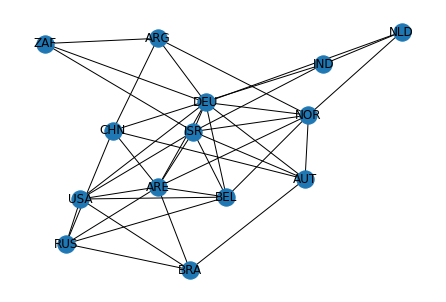

In [12]:
nx.draw(G,with_labels = True)

In [13]:
nós = G.number_of_nodes()
arestas = G.number_of_edges()
print(f"({nós}, {arestas})")

(14, 38)


**Questão 2.** A _centralidade de grau_ `deg`, calculada para cada nó do grafo completo pelo módulo `networkx`, pode ser interpretada, para este estudo de caso, como uma medida relativa da pré-disposição de um país para se abrir à globalização. Neste sentido, calcule `deg` e assinale a opção cujo país é o mais **fechado** ao fenômeno da globalização.

A. CHN

B. BRA

C. ARG

***D. NLD***

<div class="alert alert-block alert-success">
<b>Resposta:</b> D. NLD
</div>

In [14]:
menor = 100
maior = 0
for grau in nx.degree_centrality(G):
    if nx.degree_centrality(G)[grau] <= menor:
        menor = nx.degree_centrality(G)[grau]
        print(f"Menor valor encontrado até agora: {grau}, {nx.degree_centrality(G)[grau]}")



Menor valor encontrado até agora: ARG, 0.3076923076923077
Menor valor encontrado até agora: ZAF, 0.23076923076923078
Menor valor encontrado até agora: IND, 0.23076923076923078
Menor valor encontrado até agora: NLD, 0.23076923076923078


In [15]:
nx.degree_centrality(G)

{'ARG': 0.3076923076923077,
 'CHN': 0.38461538461538464,
 'DEU': 0.6923076923076923,
 'NOR': 0.5384615384615385,
 'ZAF': 0.23076923076923078,
 'AUT': 0.38461538461538464,
 'BRA': 0.3076923076923077,
 'ISR': 0.6153846153846154,
 'BEL': 0.46153846153846156,
 'ARE': 0.6153846153846154,
 'USA': 0.46153846153846156,
 'RUS': 0.38461538461538464,
 'IND': 0.23076923076923078,
 'NLD': 0.23076923076923078}

In [16]:
nx.degree_centrality(G)["ZAF"]

0.23076923076923078

In [17]:
nx.degree_centrality(G)["IND"]

0.23076923076923078

In [18]:
nx.degree_centrality(G)["NLD"]

0.23076923076923078

**Questão 3.** Semelhantemente à interpretação da questão anterior, a _centralidade de intermediação_ `bet` fornece uma medida relativa de quão boa é a confiança e respeitabilidade diplomática de um país para a concretização de acordos. Calcule `bet` e assinale a opção cujo país é o mais respeitado para intermediar acordos.

A. AUT

B. ZAF

***C. DEU***

D. ISR

<div class="alert alert-block alert-success">
<b>Resposta:</b> C. DEU
</div>

In [19]:
nx.betweenness_centrality(G)

{'ARG': 0.027472527472527472,
 'CHN': 0.0839896214896215,
 'DEU': 0.16265262515262513,
 'NOR': 0.06858974358974358,
 'ZAF': 0.004273504273504273,
 'AUT': 0.050534188034188035,
 'BRA': 0.013247863247863246,
 'ISR': 0.12664835164835167,
 'BEL': 0.026098901098901096,
 'ARE': 0.09372710622710621,
 'USA': 0.03774420024420024,
 'RUS': 0.025106837606837604,
 'IND': 0.023504273504273504,
 'NLD': 0.01282051282051282}

In [20]:
nx.betweenness_centrality(G)['AUT']

0.050534188034188035

In [21]:
nx.betweenness_centrality(G)['ZAF']

0.004273504273504273

In [22]:
nx.betweenness_centrality(G)['ISR']

0.12664835164835167

In [23]:
nx.betweenness_centrality(G)['DEU']

0.16265262515262513